In [1]:
#%matplotlib inline

In [2]:
from datetime import datetime, timedelta

import random
from copy import deepcopy

import pandas as pd
import matplotlib.pyplot as plt

In [3]:
import ciw
import requests

def daterange(start_date_: datetime, end_date_: datetime):
    # https://stackoverflow.com/a/1060330
    for n in range(int((end_date_ - start_date_).days)):
        yield start_date_ + timedelta(n)

def daterange_hour(start_date_: datetime, end_date_: datetime):
    # https://stackoverflow.com/a/1060330
    for n in range(int((end_date_ - start_date_).days)):
        for h in range(24):
            yield start_date_ + timedelta(days=n, hours=h)

def special_events_between(begin, end):
    return (d.strftime("%d/%m") for d in daterange(begin, end))

def simulate_queue_day(number_of_vehicles,service_distributions,number_of_servers):
    arrival_distribution = number_of_vehicles/60
    network = ciw.create_network(
        arrival_distributions=[ciw.dists.Exponential(rate=arrival_distribution)],
        service_distributions=[ciw.dists.Exponential(rate=service_distributions)],
        number_of_servers=[number_of_servers]
    )

    ciw.seed(1)

    queue = ciw.Simulation(network)
    queue.simulate_until_max_time(60)

    recs = queue.get_all_records()

    waits = [r.waiting_time for r in recs]

    mean_waiting_time = sum(waits) / len(waits)
    return mean_waiting_time

def getWeatherByday(timestamp):
    key = '5af75ce9f0c444a0af1162744220701'
    Data_Dict = {'avgtempC': 0,'pressure': 0, 'precipMM':0,'windspeedKmph':0}
    day = datetime.fromtimestamp(timestamp).date().strftime('%Y-%m-%d')
    url = 'http://api.worldweatheronline.com/premium/v1/past-weather.ashx?key='+key+'&q=France&format=json&date='+day
    resp = requests.get(url=url)
    data = resp.json()
    Data_Dict['avgtempC'] = data['data']['weather'][0]['avgtempC']
    Data_Dict['pressure'] = data['data']['weather'][0]['hourly'][0]['pressure']
    Data_Dict['precipMM'] = data['data']['weather'][0]['hourly'][0]['precipMM']
    Data_Dict['windspeedKmph'] = data['data']['weather'][0]['hourly'][0]['windspeedKmph']
    return Data_Dict

In [4]:
rules = {
    "avg_truck_waiting": 7,
    "avg_car_waiting": 3,
    "variations": {
        "trucks_ratio_variation_in": 0.1,
        "trucks_ratio_variation_out": 0.15,
        "avg_truck_waiting_variation": 0.4,
        "avg_car_waiting_variation": 0.25
    },
    "days": {
        "Monday": {
            "min_in": 2900,
            "max_in": 3200,
            "trucks_ratio_in": 1/10,
            "hours_ratios_in": [0.3, 0.2, 0.2, 0.3, 0.5, 0.9, 1.1, 1.7, 1.8, 1.2, 1, 1.2, 1, 1, 1, 1.1, 1.2, 1.7, 1.8, 1.3, 1.3, 1, 0.7, 0.5],
            "min_out": 3000,
            "max_out": 3200,
            "trucks_ratio_out": 1/9,
            "hours_ratios_out": [0.3, 0.2, 0.2, 0.3, 0.5, 0.9, 1.1, 1.7, 1.8, 1.2, 1, 1.2, 1, 1, 1, 1.1, 1.2, 1.7, 1.8, 1.3, 1.3, 1, 0.7, 0.5],
            "number_of_service_present_per_hour": 4
        },
        "Tuesday": {
            "min_in": 2700,
            "max_in": 3100,
            "trucks_ratio_in": 1/11,
            "hours_ratios_in": [0.3, 0.2, 0.2, 0.3, 0.5, 0.9, 1.1, 1.7, 1.8, 1.2, 1, 1.2, 1, 1, 1, 1.1, 1.2, 1.7, 1.8, 1.3, 1.3, 1, 0.7, 0.5],
            "min_out": 3000,
            "max_out": 3300,
            "trucks_ratio_out": 1/10,
            "hours_ratios_out": [0.3, 0.2, 0.2, 0.3, 0.5, 0.9, 1.1, 1.7, 1.8, 1.2, 1, 1.2, 1, 1, 1, 1.1, 1.2, 1.7, 1.8, 1.3, 1.3, 1, 0.7, 0.5],
            "number_of_service_present_per_hour": 4
        },
        "Wednesday": {
            "min_in": 3000,
            "max_in": 3100,
            "trucks_ratio_in": 1/8,
            "hours_ratios_in": [0.3, 0.2, 0.2, 0.3, 0.5, 0.9, 1.1, 1.7, 1.8, 1.2, 1, 1.2, 1, 1, 1, 1.1, 1.2, 1.7, 1.8, 1.3, 1.3, 1, 0.7, 0.5],
            "min_out": 2700,
            "max_out": 3100,
            "trucks_ratio_out": 1/9,
            "hours_ratios_out": [0.3, 0.2, 0.2, 0.3, 0.5, 0.9, 1.1, 1.7, 1.8, 1.2, 1, 1.2, 1, 1, 1, 1.1, 1.2, 1.7, 1.8, 1.3, 1.3, 1, 0.7, 0.5],
            "number_of_service_present_per_hour": 3
        },
        "Thursday": {
            "min_in": 2600,
            "max_in": 3100,
            "trucks_ratio_in": 1/12,
            "hours_ratios_in": [0.3, 0.2, 0.2, 0.3, 0.5, 0.9, 1.1, 1.7, 1.8, 1.2, 1, 1.2, 1, 1, 1, 1.1, 1.2, 1.7, 1.8, 1.3, 1.3, 1, 0.7, 0.5],
            "min_out": 2800,
            "max_out": 3100,
            "trucks_ratio_out": 1/7,
            "hours_ratios_out": [0.3, 0.2, 0.2, 0.3, 0.5, 0.9, 1.1, 1.7, 1.8, 1.2, 1, 1.2, 1, 1, 1, 1.1, 1.2, 1.7, 1.8, 1.3, 1.3, 1, 0.7, 0.5],
            "number_of_service_present_per_hour": 4
        },
        "Friday": {
            "min_in": 2900,
            "max_in": 3100,
            "trucks_ratio_in": 1/10,
            "hours_ratios_in": [0.3, 0.2, 0.2, 0.3, 0.5, 0.9, 1.1, 1.7, 1.8, 1.2, 1, 1.2, 1, 1, 1, 1.1, 1.2, 1.7, 1.8, 1.3, 1.3, 1, 0.7, 0.5],
            "min_out": 2800,
            "max_out": 3100,
            "trucks_ratio_out": 1/10,
            "hours_ratios_out": [0.3, 0.2, 0.2, 0.3, 0.5, 0.9, 1.1, 1.7, 1.8, 1.2, 1, 1.2, 1, 1, 1, 1.1, 1.2, 1.7, 1.8, 1.3, 1.3, 1, 0.7, 0.5],
            "number_of_service_present_per_hour": 4
        },
        "Saturday": {
            "min_in": 2900,
            "max_in": 3100,
            "trucks_ratio_in": 1/16,
            "hours_ratios_in": [0.3, 0.2, 0.2, 0.3, 0.4, 0.5, 0.8, 1.2, 1.6, 1.7, 1.5, 1.2, 1.2, 1.3, 1.2, 1.4, 1.4, 1.6, 1.5, 1.2, 1.1, 1, 0.8, 0.4],
            "min_out": 3100,
            "max_out": 3200,
            "trucks_ratio_out": 1/17,
            "hours_ratios_out": [0.3, 0.2, 0.2, 0.3, 0.4, 0.5, 0.8, 1.2, 1.6, 1.7, 1.5, 1.2, 1.2, 1.3, 1.2, 1.4, 1.4, 1.6, 1.5, 1.2, 1.1, 1, 0.8, 0.4],
            "number_of_service_present_per_hour": 5
        },
        "Sunday": {
            "min_in": 1600,
            "max_in": 1800,
            "trucks_ratio_in": 1/25,
            "hours_ratios_in": [0.3, 0.2, 0.2, 0.3, 0.4, 0.5, 0.8, 1.2, 1.6, 1.7, 1.5, 1.2, 1.2, 1.3, 1.2, 1.4, 1.4, 1.6, 1.5, 1.2, 1.1, 1, 0.8, 0.4],
            "min_out": 1700,
            "max_out": 2400,
            "trucks_ratio_out": 1/26,
            "hours_ratios_out": [0.3, 0.2, 0.2, 0.3, 0.4, 0.5, 0.8, 1.2, 1.6, 1.7, 1.5, 1.2, 1.2, 1.3, 1.2, 1.4, 1.4, 1.6, 1.5, 1.2, 1.1, 1, 0.8, 0.4],
            "number_of_service_present_per_hour": 5
        }
    },
    "special_events": {
        "dates": {

            d: f for dates, f in zip(
                [
                    special_events_between(datetime(1970, 10, 23), datetime(1970, 11, 8)), # toussaint
                    special_events_between(datetime(1970, 12, 18), datetime(1970, 1, 3)), # noel
                    special_events_between(datetime(1970, 2, 12), datetime(1970, 3, 7)), # hiver
                    special_events_between(datetime(1970, 4, 16), datetime(1970, 5, 9)), # printemps
                    special_events_between(datetime(1970, 7, 7), datetime(1970, 8, 30)) # ete
                ],
                [(2.3, 0.7), (2.5, 0.3), (2.3, 0.7), (2.1, 0.8), (2.7, 0.6)]
            ) for d in dates
        },
        "meteo": {
            "soleil": (1, 1),
            "pluie": (0.89, 1.4),
            "nuageux": (0.96, 1.1),
            "neige": (0.5, 0.6),
            "tempete": (0.2, 0.3)
        }
    }
}

In [5]:
from typing import Any, Dict
import time

start_date = datetime(2020, 1, 1)
end_date = datetime(2021, 1, 1)

generated = [[
    "ts", "avg_nb_vehicules_in_per_hour", "nb_trucks_in", "nb_cars_in", "avg_waiting_in", "avg_nb_vehicules_out_per_hour", "nb_trucks_out",
    "nb_cars_out", "avg_waiting_out", "avg_temperature" ,"pressure" , "precipitaion_MM" , "windspeed_Kmph"
]]

def is_special(date):
    return date.strftime("%d/%m") in rules["special_events"]["dates"]

def get_generation_parameters(date: datetime) -> Dict[str, Any]:
    params = rules["days"][date.strftime("%A")]
    params["trucks_ratio_variation_in"] = rules["variations"]["trucks_ratio_variation_in"]
    params["trucks_ratio_variation_out"] = rules["variations"]["trucks_ratio_variation_out"]
    params["avg_truck_waiting"] = rules["avg_truck_waiting"]
    params["avg_car_waiting"] = rules["avg_car_waiting"]
    params["avg_truck_waiting_variation"] = rules["variations"]["avg_truck_waiting_variation"]
    params["avg_car_waiting_variation"] = rules["variations"]["avg_car_waiting_variation"]
    if is_special(date):
        params = deepcopy(params)
        factors = rules["special_events"]["dates"][date.strftime("%d/%m")]
        params["min_in"] = int(params["min_in"] * factors[0])
        params["max_in"] = int(params["max_in"] * factors[0])
        params["min_out"] = int(params["min_out"] * factors[0])
        params["max_out"] = int(params["max_out"] * factors[0])
        params["trucks_ratio_in"] *= factors[1]
        params["trucks_ratio_out"] *= factors[1]
        params["number_of_service_present_per_hour"] = int(params["number_of_service_present_per_hour"]*factors[0]/1.8)
    return params

def generate_for_date_with_hour(date: datetime):
    gen_params = get_generation_parameters(date)
    new_gen = [date.timestamp()]
    weather_data = getWeatherByday(date.timestamp())
    temperature = int(weather_data['avgtempC'])
    pression = int(weather_data['pressure'])
    precipitation = float(weather_data['precipMM'])
    wind_speed = int(weather_data['windspeedKmph'])
    coeff =  temperature/9.5 + pression/1030 - precipitation - wind_speed/10
    # IN
    nb_vehicules_in = int(random.randint(gen_params["min_in"], gen_params["max_in"] + 1) / 24 * gen_params["hours_ratios_in"][date.hour])
    if(coeff>0) : nb_vehicules_in += int(nb_vehicules_in*coeff)
    new_gen.append(nb_vehicules_in) # nb_vehicules_in
    trucks_ratio_in = gen_params["trucks_ratio_in"] * random.uniform(1 - gen_params["trucks_ratio_variation_in"], 1 + gen_params["trucks_ratio_variation_in"])
    nb_trucks_in = int(nb_vehicules_in * trucks_ratio_in)
    new_gen.append(nb_trucks_in) # nb_trucks_in
    nb_cars_in = (nb_vehicules_in - nb_trucks_in)
    new_gen.append(nb_cars_in) # nb_cars_in
    number_of_services = gen_params["number_of_service_present_per_hour"]
    avg_waiting_time_in = simulate_queue_day(nb_vehicules_in,0.1,number_of_services)

    new_gen.append(avg_waiting_time_in) # avg_waiting_in
    # OUT
    nb_vehicules_out = int(random.randint(gen_params["min_out"], gen_params["max_out"] + 1) / 24 * gen_params["hours_ratios_out"][date.hour])
    if(coeff>0) : nb_vehicules_out += int(nb_vehicules_out*coeff)
    new_gen.append(nb_vehicules_out) # nb_vehicules_out
    trucks_ratio_out = gen_params["trucks_ratio_out"] * random.uniform(1 - gen_params["trucks_ratio_variation_out"], 1 + gen_params["trucks_ratio_variation_out"])
    nb_trucks_out = int(nb_vehicules_out * trucks_ratio_out)
    new_gen.append(nb_trucks_out) # nb_trucks_out
    nb_cars_out = (nb_vehicules_out - nb_trucks_out)
    new_gen.append(nb_cars_out) # nb_cars_out
    avg_waiting_time_out = simulate_queue_day( nb_vehicules_out,0.1,number_of_services)
    new_gen.append(avg_waiting_time_out) # avg_waiting_out
    new_gen.append(temperature)
    new_gen.append(pression)
    new_gen.append(precipitation)
    new_gen.append(wind_speed)
    return new_gen

before_time = time.time()
for single_date in daterange_hour(start_date, end_date):
    generated += [generate_for_date_with_hour(single_date)]
after_time = time.time()
print("Duration=", after_time - before_time)

Duration= 670.513368844986


In [6]:
df = pd.DataFrame(generated[1:], columns=generated[0])
df["ts"] = pd.to_datetime(df["ts"], unit="s").dt.tz_localize('UTC').dt.tz_convert('Europe/Paris')
df = df.set_index('ts', drop=False)
df.head(25)

,ts,avg_nb_vehicules_in_per_hour,nb_trucks_in,nb_cars_in,avg_waiting_in,avg_nb_vehicules_out_per_hour,nb_trucks_out,nb_cars_out,avg_waiting_out,avg_temperature,pressure,precipitaion_MM,windspeed_Kmph
ts,,,,,,,,,,,,,
2020-01-01 00:00:00+01:00,2020-01-01 00:00:00+01:00,69,8,61,8.036148,60,6,54,13.206281,4,1032,0.0,6
2020-01-01 01:00:00+01:00,2020-01-01 01:00:00+01:00,45,5,40,6.873871,43,4,39,7.555366,4,1032,0.0,6
2020-01-01 02:00:00+01:00,2020-01-01 02:00:00+01:00,45,6,39,6.873871,43,4,39,7.555366,4,1032,0.0,6
2020-01-01 03:00:00+01:00,2020-01-01 03:00:00+01:00,69,9,60,8.036148,60,6,54,13.206281,4,1032,0.0,6
2020-01-01 04:00:00+01:00,2020-01-01 04:00:00+01:00,116,14,102,18.218284,102,10,92,15.767604,4,1032,0.0,6
2020-01-01 05:00:00+01:00,2020-01-01 05:00:00+01:00,204,26,178,18.975649,207,25,182,19.463132,4,1032,0.0,6
2020-01-01 06:00:00+01:00,2020-01-01 06:00:00+01:00,255,29,226,18.276993,236,28,208,11.423053,4,1032,0.0,6
2020-01-01 07:00:00+01:00,2020-01-01 07:00:00+01:00,393,45,348,11.209447,381,43,338,20.337077,4,1032,0.0,6
2020-01-01 08:00:00+01:00,2020-01-01 08:00:00+01:00,413,49,364,19.953328,386,45,341,23.082433,4,1032,0.0,6


In [7]:
df.to_csv("dataset_custom_sample_per_hour_v1.csv", index=False)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8784 entries, 2020-01-01 00:00:00+01:00 to 2020-12-31 23:00:00+01:00
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype                       
---  ------                         --------------  -----                       
 0   ts                             8784 non-null   datetime64[ns, Europe/Paris]
 1   avg_nb_vehicules_in_per_hour   8784 non-null   int64                       
 2   nb_trucks_in                   8784 non-null   int64                       
 3   nb_cars_in                     8784 non-null   int64                       
 4   avg_waiting_in                 8784 non-null   float64                     
 5   avg_nb_vehicules_out_per_hour  8784 non-null   int64                       
 6   nb_trucks_out                  8784 non-null   int64                       
 7   nb_cars_out                    8784 non-null   int64                       
 8   avg_waiting_out               

In [9]:
df.describe()

,avg_nb_vehicules_in_per_hour,nb_trucks_in,nb_cars_in,avg_waiting_in,avg_nb_vehicules_out_per_hour,nb_trucks_out,nb_cars_out,avg_waiting_out,avg_temperature,pressure,precipitaion_MM,windspeed_Kmph
count,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000
mean,395.159950,27.597564,367.562386,17.843728,408.961293,31.106444,377.854850,18.044064,14.786885,1017.005464,0.253825,12.901639
std,403.391049,25.893190,380.529577,4.888040,413.072017,29.557451,387.982118,4.624838,6.626905,9.479592,0.827760,6.393765
min,13.000000,0.000000,13.000000,0.000000,18.000000,0.000000,18.000000,0.014449,3.000000,977.000000,0.000000,2.000000
25%,138.000000,9.000000,127.000000,15.958875,145.000000,10.000000,133.000000,16.235092,9.000000,1012.000000,0.000000,8.000000
50%,269.000000,20.000000,247.000000,18.863791,279.000000,22.000000,256.000000,18.935190,14.000000,1018.000000,0.000000,12.000000
75%,480.000000,38.000000,443.000000,20.976233,498.000000,42.000000,454.000000,21.041374,20.000000,1023.000000,0.100000,17.000000
max,2768.000000,211.000000,2622.000000,31.400192,3044.000000,225.000000,2874.000000,30.805071,33.000000,1045.000000,5.800000,42.000000


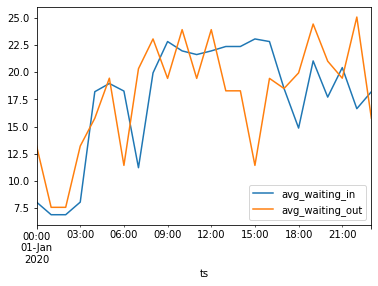

In [10]:
df[["avg_waiting_in", "avg_waiting_out"]][:24].plot(kind="line")  # for one day
plt.show()

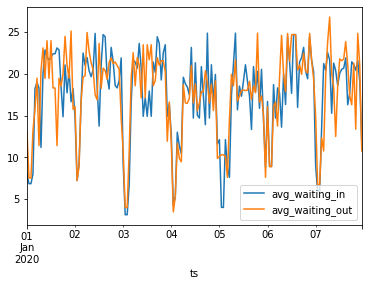

In [11]:
df[["avg_waiting_in", "avg_waiting_out"]][:24*7].plot(kind="line")  # for one week
plt.show()

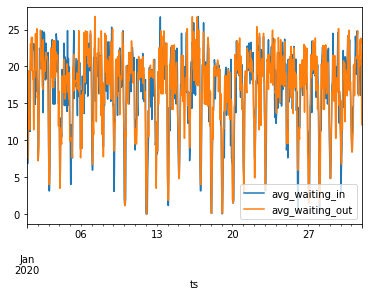

In [12]:
df[["avg_waiting_in", "avg_waiting_out"]][:24*31].plot(kind="line")  # for one month
plt.show()

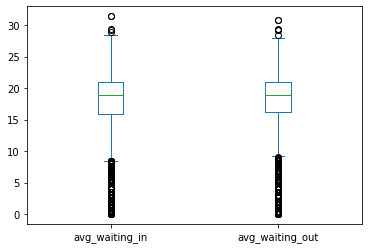

In [13]:
df[["avg_waiting_in", "avg_waiting_out"]].plot(kind="box")
plt.show()

# Preparing train/test datasets

In [14]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [15]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(df[["nb_trucks_in", "nb_cars_in", "avg_waiting_in"]])

In [16]:
train_size_in = int(0.8*(dataset.shape[0]))

train_in = pd.DataFrame(df[["nb_trucks_in", "nb_cars_in", "avg_waiting_in"]][:train_size_in])
train_in.reset_index(inplace=True)
train_in.rename(columns={'ts':'ds','avg_waiting_in':'y'}, inplace=True)
train_in["ds"] = train_in["ds"].dt.tz_localize(None)
test_in = pd.DataFrame(df[["nb_trucks_in", "nb_cars_in", "avg_waiting_in"]][train_size_in:])
test_in.reset_index(inplace=True)
test_in.rename(columns={'ts':'ds','avg_waiting_in':'y'}, inplace=True)
test_in["ds"] = test_in["ds"].dt.tz_localize(None)

train_in.head()

,ds,nb_trucks_in,nb_cars_in,y
0,2020-01-01 00:00:00,8,61,8.036148
1,2020-01-01 01:00:00,5,40,6.873871
2,2020-01-01 02:00:00,6,39,6.873871
3,2020-01-01 03:00:00,9,60,8.036148
4,2020-01-01 04:00:00,14,102,18.218284


In [17]:
from fbprophet import Prophet
import optuna

optuna.logging.set_verbosity(optuna.logging.WARNING)
optuna.__version__

ModuleNotFoundError: No module named 'fbprophet'

## Prediction : FBProphet x Optuna : avg waiting (in)

In [ ]:
def objective(trial):
    params = {
        'changepoint_prior_scale': trial.suggest_float('changepoint_prior_scale', 0.005, 5),
        'changepoint_range': trial.suggest_float('changepoint_range', 0.8, 0.9),
        'seasonality_prior_scale': trial.suggest_float('seasonality_prior_scale', 0.1, 10),
        'holidays_prior_scale': trial.suggest_float('holidays_prior_scale', 0.1, 10),
        'seasonality_mode': trial.suggest_categorical('seasonality_mode', ['multiplicative', 'additive']),
        # 'growth': trial.suggest_categorical('growth', ['linear', 'logistic']), => ValueError: Capacities must be supplied for logistic growth in column "cap"
        'growth': trial.suggest_categorical('growth', ['linear']),
        'weekly_seasonality': trial.suggest_int('weekly_seasonality', 5, 10),
        'yearly_seasonality': trial.suggest_int('yearly_seasonality', 1, 20)
    }

    m = Prophet(**params)
    m.add_country_holidays(country_name='FR')
    m.fit(train_in)
    predictions = m.predict(test_in)

    mae_score = mean_absolute_error(test_in['y'], predictions['yhat'])
    return mae_score
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=10)

In [ ]:
study.best_params

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

def regression_report(y_true, y_pred):
    mae_score = mean_absolute_error(y_true, y_pred)
    mse_score = mean_squared_error(y_true, y_pred)
    R2_score = r2_score(y_true, y_pred)

    report_dict = {
        'mae_score': mae_score,
        'mse_score': mse_score,
        'r2_score': R2_score
    }

    return report_dict
prophet_in_tuned = Prophet(**study.best_params)
prophet_in_tuned.add_country_holidays(country_name='FR')

prophet_in_tuned.fit(train_in)
forecast_in_tuned = prophet_in_tuned.predict(test_in)

In [ ]:
nb_predicted = forecast_in_tuned['yhat'].shape[0]
result_prophet_in_tuned = regression_report(test_in['y'][-nb_predicted:], forecast_in_tuned['yhat'])
result_prophet_in_tuned

In [ ]:
prophet_in_tuned.plot(forecast_in_tuned)
plt.show()

In [ ]:
forecast_in_tuned["ds"] = forecast_in_tuned["ds"].dt.tz_localize('UTC').dt.tz_convert('Europe/Paris')
forecast_in_tuned = forecast_in_tuned.set_index(["ds"], drop=False)
forecast_in_tuned

In [ ]:
_, ax = plt.subplots(1, 1)
df[["avg_waiting_in"]][-24:].plot(ax=ax, kind="line")
ax2 = ax.twinx()
forecast_in_tuned["yhat"][-24:].plot(ax=ax2, kind="line", color="orange")
plt.show()

In [ ]:
_, ax = plt.subplots(1, 1)
df[["avg_waiting_in"]][-24*7:].plot(ax=ax, kind="line")
ax2 = ax.twinx()
forecast_in_tuned["yhat"][-24*7:].plot(ax=ax2, kind="line", color="orange")
plt.show()

In [ ]:
_, ax = plt.subplots(1, 1)
df[["avg_waiting_in"]][-24*7*31:].plot(ax=ax, kind="line")
ax2 = ax.twinx()
forecast_in_tuned["yhat"][-24*7*31:].plot(ax=ax2, kind="line", color="orange")
plt.show()

In [ ]:
train_in_next = pd.DataFrame(df[["nb_trucks_in", "nb_cars_in", "avg_waiting_in"]][:train_size_in+1])
train_in_next.reset_index(inplace=True)
train_in_next.rename(columns={'ts':'ds','avg_waiting_in':'y'}, inplace=True)
train_in_next["ds"] = train_in_next["ds"].dt.tz_localize(None)
test_in_next = pd.DataFrame(df[["nb_trucks_in", "nb_cars_in", "avg_waiting_in"]][:train_size_in+1])
test_in_next.reset_index(inplace=True)
test_in_next.rename(columns={'ts':'ds','avg_waiting_in':'y'}, inplace=True)
test_in_next["ds"] = test_in_next["ds"].dt.tz_localize(None)

train_in_next.head()

In [ ]:
def stan_init(m):
    """Retrieve parameters from a trained model.

    Retrieve parameters from a trained model in the format
    used to initialize a new Stan model.

    Parameters
    ----------
    m: A trained model of the Prophet class.

    Returns
    -------
    A Dictionary containing retrieved parameters of m.

    """
    res = {}
    for pname in ['k', 'm', 'sigma_obs']:
        res[pname] = m.params[pname][0][0]
    for pname in ['delta', 'beta']:
        res[pname] = m.params[pname][0]
    return res

_prophet_in_tuned_r = Prophet().fit(train_in)
prophet_in_tuned_reloaded = Prophet(**study.best_params)
prophet_in_tuned_reloaded.fit(train_in_next, init=stan_init(_prophet_in_tuned_r))

In [ ]:
from neuralprophet import NeuralProphet

In [ ]:
train_in = pd.DataFrame(df[["nb_trucks_in", "nb_cars_in", "avg_waiting_in"]][:train_size_in])
train_in.reset_index(inplace=True)
train_in.rename(columns={'ts':'ds','avg_waiting_in':'y'}, inplace=True)
train_in["ds"] = train_in["ds"].dt.tz_localize(None)
test_in = pd.DataFrame(df[["nb_trucks_in", "nb_cars_in", "avg_waiting_in"]][train_size_in:])
test_in.reset_index(inplace=True)
test_in.rename(columns={'ts':'ds','avg_waiting_in':'y'}, inplace=True)
test_in["ds"] = test_in["ds"].dt.tz_localize(None)

In [ ]:
neural_prophet_in = NeuralProphet()
neural_prophet_in.fit(train_in, freq='H')

# ideas
- fbprophet => warm
- neuralprophet
- multiple mono-variate fbprophet + average
- deepAR